# Week 2 - Numpy, Pandas and SciPy

This week we are going to learn about the fundamental libraries for data science in Python - `numpy`, `pandas`, and `scipy`. These are workhorse libraries that make our work faster and more efficient, and give us some tools to make our lives far easier when working with data.

## Numpy

`numpy` (pronounced num-pie), concerns itself with multidimensional arrays. In Python, we can have lists, lists of list, and list of lists of lists etc, but working with these can be quite annoying, and relatively "slow" when compared with other languages. `numpy` speeds this up by working a a lower level than Python (closer to processor commands), and provides some more intuitive syntax for working with multidimensional arrays with two main drawbacks: an array must contain all the same type of object (typically numeric), and must have equally sized sub-arrays (we can only have 3x5 matrices for example, not a 3 row matrix with 2 rows of length 5 and one row of length 4). For mathematical computation (and data!), these drawbacks don't really matter, and in some cases can stop bad things from happening!

So let's look at how we can start using `numpy`. As with `matplotlib`, the standard is to import `numpy` under and alias to save time (programmers are lazy!). `np` is what everyone uses. To define a `numpy` array, we pass a list into the `np.array` function, which will create a new `nd.array` (`nd` here standing for n-dimensional!) with our data. There is one common pitfall here and that is passing a bunch of numbers as different arguments instead of just one list, so watch out!


In [1]:
import numpy as np

# Define new array using a list. Note that there's one argument to the fn
# not seperated by commas! Just 1 list!
# Also now everything in the array has to have the same type
a = np.array([1,2,3,4])

print(a)

[1 2 3 4]


There are a few helpful attributes of a `numpy` array that are helpful to know, for debugging purposes: 

In [2]:
# New debugging tools:
print("Shape:", a.shape)
print("Number of dimensions:", a.ndim)
print("Types of the items inside:", a.dtype.name)
print("Size of array:", a.size)

Shape: (4,)
Number of dimensions: 1
Types of the items inside: int64
Size of array: 4


Often it's helpful to have some ready-made arrays ready to go that are generated algorithmically - `numpy` has a lot of these (read the docs!), but the most common ones are as follows:

In [3]:
# Other ways to make arrays:
arranged = np.arange(15)
linspace = np.linspace(0, 10, 10)
zeros = np.zeros((3,5))
ones = np.ones((2,3,4))

print(arranged)
print(linspace)
print(zeros)
print(ones)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


Manipulating arrays is extremely important - often knowing a few operations and combining them can get you where you need to be, but there is also often a shortcut function that is even more efficient - again, the documentation is your friend here! Here are my top 4 functions for manipulating data:

In [4]:
# Reshaping arrays
print(arranged.reshape(3,5)) 

# -1 means numpy infers size
print(arranged.reshape(5, 1, -1))

# Transpose array
print(arranged.reshape(3,5).T)

# Ravel array - flattens the array
print(ones.ravel())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[[ 0  1  2]]

 [[ 3  4  5]]

 [[ 6  7  8]]

 [[ 9 10 11]]

 [[12 13 14]]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Because we make some assumptions about the type of data we are working with (homogeneity of type, size constraints), we can perform operations directly on the arrays without using loops. If you are familiar with linear algebra, we can treat these as vectors, matrices or tensors (in fact, I may refer to these in this way be habit!).

In [5]:
# Operations on arrays
# Good thing about numpy is because all the types are forced, we can add entire
# arrays.

a = np.array([1, 2, 3])
b = np.array([2 ,3, 4])
print(a+b)

# These operations are vectorized, meaning they work faster than if we looped in
# native Python, due to C backend magic


[3 5 7]


Indexing a `numpy` array is done in the same way as normal Python lists, but it can be a bit confusing - we work from the outer axis in - so for 2D arrays, first the row then the column, and for 3D arrays; the "block", then the row, then the column. Slicing is done in exactly the same way - the first number is inclusive, the second exclusive.

In [6]:
# Slicing in numpy
# Take a multidimensional array

b = np.arange(30).reshape((2,3,5))
print(b)

# We can think of this as a 3D array.
# Slicing works just like in normal lists, but for multiple dims we seperate with
# commas, working from the outer dimension in

# First block, second row, 5th element as shown by numpy
print(b[0,1,4])

# Simple slice
print(b[1, 0:2, 1:3])

# Using colons to denote "all"
print(b[:, 0:2, 1:])

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]
9
[[16 17]
 [21 22]]
[[[ 1  2  3  4]
  [ 6  7  8  9]]

 [[16 17 18 19]
  [21 22 23 24]]]


Working with these arrays is important, so we'll have a quick quiz to see if you can predict some indexing operations:

In [7]:
# Quiz time!
# Here we have 3 arrays with different dimensions. What do these expressions 
# evaluate to?

a = np.arange(6) ** 2
b = np.arange(21).reshape((3, 7))
c = np.arange(45).reshape((3, 3, 5))

print("A:\n", a)
print("B:\n", b)
print("C:\n", c)


print("Solutions!")
print(a[1:])
print(a[2:5])

print(b[1,1:5])
print(b[:, 2])

print(c[0, 2, 4])
print(c[:, :, 2:])

A:
 [ 0  1  4  9 16 25]
B:
 [[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]]
C:
 [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]]]
Solutions!
[ 1  4  9 16 25]
[ 4  9 16]
[ 8  9 10 11]
[ 2  9 16]
14
[[[ 2  3  4]
  [ 7  8  9]
  [12 13 14]]

 [[17 18 19]
  [22 23 24]
  [27 28 29]]

 [[32 33 34]
  [37 38 39]
  [42 43 44]]]


As stated before, `numpy` arrays can be thought as vectors or matrices. For both of these types, there are multiple types of multiplication - `numpy` allows us to do them in different ways. It is a *very* common bug to choose the wrong type of operation, so take care when doing this, and always check for expected outputs!

In [8]:
# Numpy is used a lot for linear algebra
# Let's define two matricies and multiply them together

a = np.array([[3, 0, 3], [0, 2, 0], [1, 0, 1]])
b = np.arange(9).reshape((3,3))

print("A:\n", a)
print("B:\n", b)

# Element-wise multiplication
print("A * B")
print(a * b)

# Proper matrix multiplication
print("A @ B")
print(a @ b)

A:
 [[3 0 3]
 [0 2 0]
 [1 0 1]]
B:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
A * B
[[0 0 6]
 [0 8 0]
 [6 0 8]]
A @ B
[[18 24 30]
 [ 6  8 10]
 [ 6  8 10]]


We have just scratched the surface with `numpy`, but I implore you to check out the documentation and take a look at some of the other things it can do. For a peek behind the scenes - I use the `np.random` sublibrary a lot for generating anonymised data for the exercises for this course. Which ones? Well that would be telling!

In [9]:
# Lots more in the documentation for linear algebra. (numpy.linalg)
# We also use the random sublibrary a lot

# Uniform random
print(np.random.rand(3,2))

# Standard normal random
print(np.random.randn(4,5))

# Good for testing yourself, or sanity testing your code

# IMPORTANT: Get used to googling how to manipulate these! It's not always easy.
# Lots of methods, functions etc to use, lots of space for "in-house" optimisation

[[0.98359663 0.15319418]
 [0.86003762 0.05319845]
 [0.91705835 0.14679482]]
[[-0.3399506  -0.91514808  0.82797255 -1.01949448 -1.15611593]
 [-1.82972404 -1.47992147  0.22984392  0.08243601 -0.31533385]
 [-1.88517691  1.13227323 -0.56243918 -1.55937937 -0.9683959 ]
 [-1.40855793  2.41587126 -0.60313146  1.0696626  -0.53147466]]


# pandas

`pandas` is another workhorse module that is particularly powerful at making data more interpretable and understandable to us. It runs with `numpy` underneath, so it is still fairly fast, and gives us some very "quick to code" data reading/writing options which is often enough to justify its inclusion in small projects. If you have worked with the R programming language, Dataframes (the main `pandas` object) are lifted from there, with some slight differences to make them more Python friendly.

Unlike `numpy` arrays, we can have different datatypes for each column, so it lends itself to working with data with meaningful labels attached, such as crime data with region annotations. This means that it is usually your first stop for exploratory data analysis, for asking questions about your data and manipulating it ready for AI models.

Lastly, `pandas` does include some wrapper functions around `matplotlib` that let us make some "quick and dirty" plots of our data. Generally I avoid these, as any exploration of the data would also go into a report (to answer any "why?" questions), so I would make the effort to create a fully featured `matplotlib` plot (covered next week!), although you may find them helpful in showing the "shape" of your data, or getting a quick `matplotlib` object to refine more using that toolkit.

Let's start by looking at the dataframe object itself, and some ways we can use it. First, we can define a DataFrame in a number of ways. One is by passing a dictionary of column names and data:

In [10]:
import pandas as pd

# Defining a dataframe from a dictionary
test_df = pd.DataFrame({
    "Name": ["John Smith", "Jane Doe", "Joe Bloggs"],
    "Ages": [34, 55, 15],
    "Job": ["Lecturer", "Data Scientist", "Student"]
})

# Breaking my own rule here. Outputting a dataframe in a cell formats it nicely.
test_df

,Name,Ages,Job
0,John Smith,34,Lecturer
1,Jane Doe,55,Data Scientist
2,Joe Bloggs,15,Student


Another way is to use a `numpy` array:

In [11]:
# Creating a dataframe from a numpy array
# Not that useful in practice but useful for sanity checks

test_df2 = pd.DataFrame(np.random.randn(5,5))

test_df2

,0,1,2,3,4
0,-1.419171,-1.099854,0.818773,-1.049333,0.119632
1,0.569406,1.954995,2.260636,0.073445,-0.931863
2,1.358944,1.192691,-0.870942,1.069876,1.661209
3,1.650708,-1.473542,1.844979,-0.074414,-1.706066
4,0.819320,0.338527,2.336529,0.697865,-0.170014


The third way, which I would recommend, is by using the built in I/O functions. To get the course files, there are 3 options:

* (The easy, but slow way). Download the files from the GitHub repo, then upload them to colab using the Files interface
* (The cool, fast way). Use a terminal command to download the file (!wget)
* (The lazy (good!), temporary way). Reference the URL directly. Only works sometimes!

The first way will be demonstrated in the session, and will only work with `colab`. The second way will work as follow on any `jupyter` system:

In [12]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/io_test.csv"

--2021-09-11 15:04:36--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/io_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9941 (9.7K) [text/plain]
Saving to: ‘io_test.csv.1’

io_test.csv.1       100%[===================>]   9.71K  --.-KB/s    in 0s      

2021-09-11 15:04:36 (37.5 MB/s) - ‘io_test.csv.1’ saved [9941/9941]



Once we have a file, we have two options - we can either import the code using the built in Python read functionality - I have put this below to show how long this would take moreso than as a learning moment!

In [13]:
# Let's talk about I/O for a bit.

# Importing files into colab.


with open("./io_test.csv", "r") as my_file:
    # Read data from file
    data = my_file.read()

    # Start to parse data
    data = data.split("\n")


    def col_split(string):
        return string.split(",")

    data = list(map(col_split, data))

# Get rid of first and last lines due to artifacts when loading
df = pd.DataFrame(data[1:-1])

# Set index to the index column
df = df.set_index(0)

# Phew!
df


,1,2,3,4,5
0,,,,,
0,0.1432153039712626,0.15799417876536237,0.4970620536852365,0.290791006116899,0.3636681047611162
1,0.7892551579434275,0.8871926894425783,0.49252115533893615,0.5102460328332956,0.6455994795409915
2,0.2899205925185674,0.5769737820205402,0.6723802975293791,0.9196821357573697,0.027258426325027174
3,0.80886369867763,0.15681802894458996,0.6128850225238877,0.5973486717979002,0.9997391897516252
4,0.006903865253541586,0.6797419936806534,0.3245179359996784,0.27516001973009674,0.8109816621353563
...,...,...,...,...,...
95,0.08101946738148469,0.2937648297298163,0.7209050136639791,0.7454826197056004,0.9981047591822249
96,0.7609923873425549,0.35279289438677386,0.6531495112737837,0.7370318867637822,0.09470934936612185
97,0.890704576008212,0.8110124288834771,0.8393249984193694,0.8651849461448687,0.7656888372170907


... or we can use the relevant `pandas` function to do the work for us. This is where way 3 of the "getting the data" comes in - sometimes we can reference the URL of where the data is and get it straight in. Whether you can do this or not depends on the settings of where you are trying to get the data from!

In [14]:
# Easier way to do it:

df = pd.read_csv("./io_test.csv", index_col=0)

# Beautiful!!!
df

# Pandas also has functions for importing excel files, JSON files, HTML tables,
# SAS, SPSS, SQL, GoogleBigQuery data etc, all (whith maybe the exception of JSON)
# Would be HORRIBLE to parse manually using Python!

,0,1,2,3,4
0,0.143215,0.157994,0.497062,0.290791,0.363668
1,0.789255,0.887193,0.492521,0.510246,0.645599
2,0.289921,0.576974,0.672380,0.919682,0.027258
3,0.808864,0.156818,0.612885,0.597349,0.999739
4,0.006904,0.679742,0.324518,0.275160,0.810982
...,...,...,...,...,...
95,0.081019,0.293765,0.720905,0.745483,0.998105
96,0.760992,0.352793,0.653150,0.737032,0.094709
97,0.890705,0.811012,0.839325,0.865185,0.765689
98,0.271124,0.275773,0.255388,0.475263,0.744314


Let's look at some pandas functionality using the publicly available "iris" dataset. It's a very popular test dataset for ML! Contains 4 measurements for 3 different species of the iris flower.

In [15]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv"

--2021-09-11 15:04:36--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4351 (4.2K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   4.25K  --.-KB/s    in 0s      

2021-09-11 15:04:37 (17.9 MB/s) - ‘iris.csv.1’ saved [4351/4351]



Now that I've downloaded the data, we can import it using `pandas`. The `index_col=0` argument to the function is a common solution to an annoying `pandas` problem where you get an extra row in your dataframe of the index, in addition to the index column.

In [16]:
iris = pd.read_csv("./iris.csv", index_col=0)

# Let's take a look at the top 5 entries using the head method
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


As with `numpy`, we have some helpful ways of telling us information about our data without a lot of work. the `.info()` method gives us a breakdown of how many non-null (that is, without data missing) rows we have for each column, as well as the data type (Dtype).

In [17]:
# Some helpful methods
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


The output here is very nice - we see that we have 150 entries, and all of the data is available. All of our columns are numeric apart from the "Species" column which is an "object" (this typically means string).

We could probably have guessed the data types from printing the head, but if you have a dataset that has 100+ columns, this method is probably the best way of getting an overview of your data.

For some simple descriptive statistics, we can use the `.describe()` method:

In [18]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This might take a bit of reading but tells us a lot about the "shape" of our data - it only does this for the numeric columns but tells us some helpful information such as the mean, standard deviation (how spread out our data is), and the min/max. For me this is a "sanity check" - are any of these numbers larger/smaller than expected? If so, why?

Very often we will want to sort our data by the values in one of the columns. Here's how we do that - notice we are now chaining methods together - we can do this because the `.sort_values()` method returns a copy of the dataframe that is sorted!

In [19]:
# Sorting data
iris.sort_values(by="Sepal.Length").head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
14,4.3,3.0,1.1,0.1,setosa
43,4.4,3.2,1.3,0.2,setosa
39,4.4,3.0,1.3,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
42,4.5,2.3,1.3,0.3,setosa


Another common task is grouping by a categorical variable (such as species), and getting information on the aggregate groups. In `pandas` this is simple, but has a "Gotcha!" that trips me up all the time! If we use the `.groupby()` method, we actually don't get a dataframe out. We get this strange "DataFrameGroupBy object". This is because we need to tell pandas *how* to group the data together - do we average the values across the groups or take the maximum from each?

In [20]:
# Grouping. The group_by will give a pandas "groupby" object which we need to 
# give some more information about how to aggregate the values

iris.groupby("Species")

This groupby object has a number of methods to get it back to a dataframe - here we use the `.mean()` method to mean each group. Now let's look at the output DataFrame:

In [21]:
# Note that this is also a dataframe - often it is useful to transform your 
# data like this and then analyse this new form.
# We can group by multiple axis as well - things get a bit messy but
# it's possible!
iris.groupby("Species").mean()

# See more aggregate functions in the documentation

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Fantastic - this gives us another dataframe with more helpful information. Now let's look at indexing our data - this can get a bit complex as there are multiple ways of getting the same thing. For indexing columns, we just use the column names as a list:

In [22]:
# Indexing data - we now have two indexes to work with

# Columns (pass a list of columns to select multiple):
iris[["Species", "Sepal.Length"]]

,Species,Sepal.Length
1,setosa,5.1
2,setosa,4.9
3,setosa,4.7
4,setosa,4.6
5,setosa,5.0
...,...,...
146,virginica,6.7
147,virginica,6.3
148,virginica,6.5
149,virginica,6.2


Rows can be done via indexing as normal, but this might be unintuitive in cases where the index column is non-numeric (see below).

In [23]:
# Rows (done by index)
iris[1:10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


Now let's have a look at a dataframe without a numeric index column - the grouped dataframe from before will work nicely. The `.loc` attribute will allow us to index rows based on their index name:

In [24]:
# The "loc" method does the same thing if your index is default, in certain
# circumstances is needed for indexing rows
iris_means = iris.groupby("Species").mean()

iris_means.loc[["setosa", "versicolor"]]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326


If we still want to index by the numeric index location of the rows, we must use `.iloc`:

In [25]:
# The "iloc" method will index non-numeric rows by index again, instead of label
iris_means.iloc[0:2]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326


`pandas` allows us to filter our data down by using a clever syntax. If we enter the expression below, look what we get out:

In [36]:
# Boolean indexing - this is super cool!
# Look at the following expression
iris["Species"] == "setosa"

1       True
2       True
3       True
4       True
5       True
       ...  
146    False
147    False
148    False
149    False
150    False
Name: Species, Length: 150, dtype: bool

This is in fact a new dataframe with boolean entries where each row corresponds to if the iris row species is equal to "setosa". So the first row is of the species setosa, so has a true entry in this new dataframe, and the last entrie is of species "virginica" (not setosa!) so has a false entry.

Given we have a dataframe like this of booleans, we can actually use this to filter our original dataframe as follows. This will give us a new dataframe only for the setosa species data:

In [27]:
# What?! This is actually a series (1D dataframe) with boolean values where
# it is True if the species column is "setosa" and false otherwise.

# To filter a dataframe we can use this boolean series - it will only return
# rows where the corresponding row in the boolean table is "True"
iris[iris["Species"] == "setosa"]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


This looks a bit strange, but allows us to get pretty technical by using complex boolean logic. For example, say we want to find all the setosa iris flowers with a sepal length of over 5cm. We do that with the following:

In [28]:
# Looks weird, right?
# But the advantage of this method is we have access to all boolean logic:
# Syntax slightly different. & = and, | = or
iris[(iris["Species"] == "setosa") & (iris["Sepal.Length"] > 5)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
11,5.4,3.7,1.5,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
17,5.4,3.9,1.3,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
19,5.7,3.8,1.7,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa
21,5.4,3.4,1.7,0.2,setosa


We're almost at the end now! If we want to make a new column from the existing data in a pandas dataframe, we use the following syntax:

In [29]:
# Setting a new column is as easy as indexing it. Can use operations on other 
# columns as in numpy arrays:
# Modelling petals as rectangles (bad)
iris["Petal.Area"] = iris["Petal.Length"] * iris["Petal.Width"]
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Area
1,5.1,3.5,1.4,0.2,setosa,0.28
2,4.9,3.0,1.4,0.2,setosa,0.28
3,4.7,3.2,1.3,0.2,setosa,0.26
4,4.6,3.1,1.5,0.2,setosa,0.30
5,5.0,3.6,1.4,0.2,setosa,0.28
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,11.96
147,6.3,2.5,5.0,1.9,virginica,9.50
148,6.5,3.0,5.2,2.0,virginica,10.40
149,6.2,3.4,5.4,2.3,virginica,12.42


Finally, there are loads of other functions and methods to the `pandas` library. Using it is really the first step in any data project - and you'll find your own functions that are helpful for your projects in due time. My favourite functionality is the `.value_counts()` method that gives a new dataframe of how many of each type of a categorical type you have - this can save hours when working with large datasets!

In [30]:
# We'll see some othe pandas methods and functions as we go, I recommend looking
# at the documentation when you have a chance. One that I use a lot is the 
# value_counts method:

iris["Species"].value_counts()

# This object is a dataframe and is often used to create bar charts
# for your data.

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

# Activity

The "housing" dataset is a publically available dataset of housing information in Windsor, Canada. The columns are labelled as follows:



*   `price` - The price of the property (this data comes from 1987 so the prices might look a bit strange!)
*   `lotsize` - Size of the property in square feet
*   `bedrooms` - Number of bedrooms in the property
*   `bathrms` - Number of bathrooms in the property
*   `stories` - Number of floors (excluding basement)
*   `driveway` - Does the property have a driveway?
*   `recroom` - Does the house have a recreational room?
*   `fullbase` - Does the house have a finished basement?
*   `gashw` - Does the house use gas for water heating?
*   `airco` - Does the house have central air conditioning
*   `garagepl` - Number of garage places
*   `prefarea` - Is the property located in a "preferred neighbourhood"

## Tasks



1.   I have given you the URL where the data is stored. Use your prefered method to import it into Python and turn it into a dataframe
2.   How expensive is the most expensive house?
3.   What is the mean size of property in square feet?
4.   What is the difference between the average cost of a house with a driveway, and one without? Does the difference in the cost correspond to the "price of a driveway". Why?
5.   Alice and Bob are looking for a new house. It needs at least 3 bedrooms, a driveway, and at least one bathroom. What is the cheapest property they can buy? What if they want to live in a preferred neighbourhood?








In [31]:
data_url = "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/housing.csv"

Finally let's look at plotting with pandas. It's not perfect, but it's great for quick plots for exploring our data and trying to find patterns to investigate using more statistical methods.

We'll be taking a much more detailed look into visualisation with Python next week!

In [32]:
# Back to the iris dataset
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Area
1,5.1,3.5,1.4,0.2,setosa,0.28
2,4.9,3.0,1.4,0.2,setosa,0.28
3,4.7,3.2,1.3,0.2,setosa,0.26
4,4.6,3.1,1.5,0.2,setosa,0.30
5,5.0,3.6,1.4,0.2,setosa,0.28


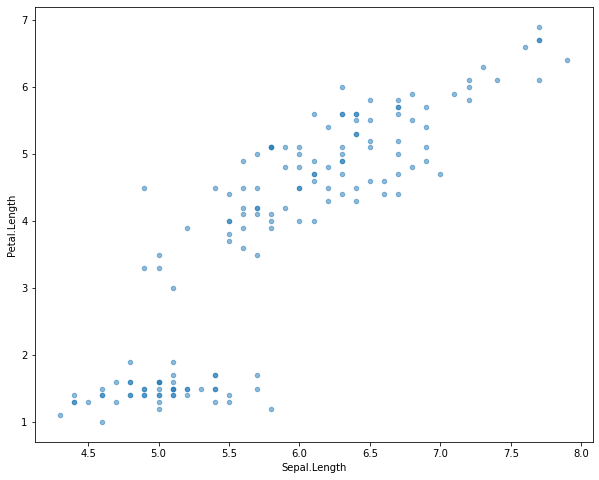

In [33]:
# Lots of different plots in pandas - again I urge you to look at the documentation
# to see what's possible. This is more of a "look at what we can do" rather than
# "how we can do it" as there's so much to cover here. To be honest, you could
# probably do an entire course on just pandas!

# Plotting can be done in a number of ways. Simplest is the .plot method
# This is the simplest but offers the least control
# We tell pandas what to plot on the x and y axis

# We still need to import matplotlib for some helper function (like showing plots)
import matplotlib.pyplot as plt

iris.plot.scatter(x="Sepal.Length", y="Petal.Length", alpha=0.5, figsize=(10, 8))
plt.show()

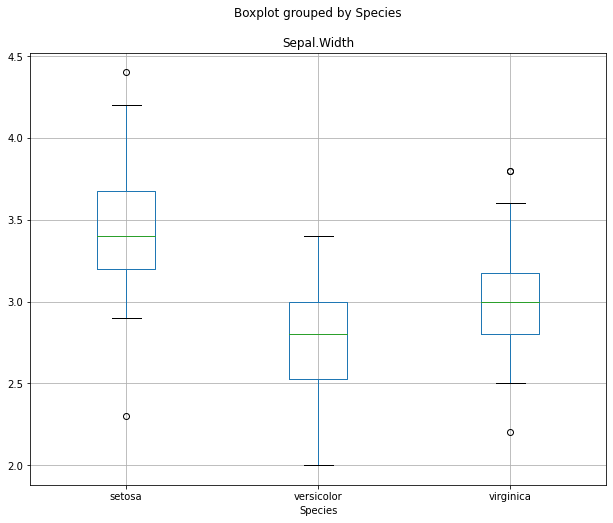

In [34]:
# We can also use some methods directly on the data to get a bit more control.
# This where I start to think about using matplotlib directly instead of pandas
# since some of the text starts to overlap if we don't fiddle with the figsize.
# It *is* possible to edit this using matplotlib functions, but it's a pain to
# do so. We'll revisit this next week when we talk more about matplotlib plotting.
# We *can* get the best of both worlds with a little work!

# Again, can't be stressed enough - you don't know these by heart. You should
# always have another tab in the backgroun to look at the documentation!

iris.boxplot(column=["Sepal.Width"], by="Species", figsize=(10, 8))
plt.show()

# Activity (extension!)

Using the housing dataset from before, create a few plots as follows:

* Scatter plot of house price vs size of property in square ft.
* Box plot of house price by number of bedrooms.
* Bar chart of number of houses with each number of bathrooms.

There are loads of different ways of doing all of these!

# SciPy

* Let's talk about SciPy - or a general purpose toolbox for a lot of scientific computing. Contains functions for optimisation, fourier transforms etc. Massive range of uses.
* Particularly helpful is the `scipy.stats` module for traditional statistical testing.
* Statistical testing is the main form of analysis for science in the 20th and 21st centuries. Very "traditional" way of doing things, and very helpful to know if you're trying to publish scientific papers.
* Some overlap with AI models - in fact some people would argue that all AI is statistics. Maybe! Statistics for me is less "model building" and more "testing things + analysis of models".
* Statistics could be its own 4 year+ course. We'll talk about the most common statistical test here for the purpose of this course. But know that `scipy` can do much more. Will talk about this a bit more in the "Doing AI Right" section of the course. VERY IMPORTANT that we don't cut corners in this bit otherwise our results are dishonest!

Probably the most helpful thing we can do here is hypothesis testing. Hypothesis testing always has the following method:

* Find out what test you need to run based on what you are trying to test for. Are two population means the same? Are two distributions the same? etc.
* What assumptions do these tests make?
* Test for these assumptions (eg test for normality)
* If we pass the tests, continue to use the original testing method. If not, find an alternative that doesn't need the assumptions
* State your null hypothesis - this will come from the test you're using.
* Get test statistic + p value
* p value is the probability of observing your data given the null hypothesis being true. Low p-value = "wow that was lucky! maybe my null hypothesis is wrong". High p-value = "Yeah my null hypothesis is probably right".
* Typically reject null hypothesis at p < 0.05

In [35]:
# The independent t-test can be used to test if two population means are the
# same given two samples of data from normally distributed populations.
# If not normally distributed, we use the Mann-Whitney test instead.

import scipy.stats as stats

# Theory - The Sepal Widths for Versicolor and Virginica species look different.
# But is this difference due to chance?

# Step 1: Test for normality within the groups. We can use the Shapiro test for this
# Null Hypothesis for this test is our data IS normally distributed.
versicolor_widths = iris[iris["Species"] == "versicolor"]["Sepal.Width"]
virginica_widths = iris[iris["Species"] == "virginica"]["Sepal.Width"]

print("Performing normality tests")
print(stats.shapiro(versicolor_widths))
print(stats.shapiro(virginica_widths))

# p values high enough to assume normality. Continue with t-test

print("Performing t-test")
print(stats.ttest_ind(versicolor_widths, virginica_widths))

Performing normality tests
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)
Performing t-test
Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)


A p-value of 0.001 is far below 0.05. Therefore, we would write that there is a significant difference between the sepal Widths of the Versicolor and Virginica species of Iris (p < 0.01).

# Activity

Finally we are at a point where we have enough knowledge to write something somewhat useful. Using the housing dataset, or a dataset of your own, come up with a hypothesis and test it formally using a scipy function. Some ideas below:



*   Is there a relationship between the price of a property and its size? (Will need to do a regression fit using `stats.linregress`. The p-value will pop out from fitting the line!
*   Are the prices of properties with and without gas water heating equal?
*   Is there a correlation between houses having air conditioning and gas water heating? (This is a bit harder, and will take some manipulation. The statistical test here is a chi squared test for independence.)

## Extension

This kind of work is a great portfolio project for showing pandas and traditional statistical skills. As an extension, write up a report on a dataset of your choice (or the housing dataset) as a Colab notebook, with multiple tests and commentary on what you're doing. 

